#**iv. Ciclotrón** #

Una partícula cargada, inicialmente en reposo en el origen, es acelerada mediante la acción de un campo eléctrico en la región comprendida entre dos regiones en forma de D. En estas regiones hay un campo magnético perpendicular que les produce un movimiento circular, cuyo radio depende de la velocidad de la partícula. El campo eléctrico debe variar de manera periódica con el fin de que en cada paso por la región entre Des se produzca una ganancia de velocidad.


![ciclotron](https://drive.google.com/uc?id=1i3WYcgtUaeL_wg727I7bulwx_kvvY7d8)


In [ ]:
import numpy as np
import math
import matplotlib.pyplot as plt
import matplotlib.patches as patches
import matplotlib.mlab as mlab
from scipy.integrate import odeint
from scipy import signal
%matplotlib inline
#import matplotlib.animation as animation
from matplotlib.pylab import *
from mpl_toolkits.axes_grid1 import host_subplot
from scipy.signal import find_peaks
import random

###########################################
DNI=25431952    # introduce tu DNI sin letra
##############################################3

random.seed(DNI)
# Diferencia de potencial entre las dos placas, o Des.
dV=random.randrange(4000,6000,1) # V

print('Voltaje entre las Des: dV= {:} V'.format(dV))

Voltaje entre las Des: dV= 5697 V


In [ ]:
############## Partículas a estudiar    ###############################
# Definimos un diccionario con todas las particulas a calcular con su valor de masa y carga
# particula = {nombre : [masa (Kg), carga(C)]}

iones={'1p+': [1.67E-27, 1.6E-19],'1e-': [9.11E-31, -1.6E-19],'1e+': [9.11E-31, 1.6E-19],
       '1H+': [1.67E-27, 1.6E-19], '2H+': [3.32E-27, 1.6E-19],'3H+': [4.98E-27, 1.6E-19], '4H+': [6.688E-22, 1.6E-19], '4He++': [6.688E-27, 3.2E-19],
       '16O+': [26.56E-27, 1.6E-19], '17O+': [28.22E-27, 1.6E-19], '18O+': [29.88E-27, 1.6E-19],
       '32S+': [53.12E-27, 1.6E-19], '33S+': [54.78E-27, 1.6E-19], '34S+': [56.44E-27, 1.6E-19],
       '35Cl+': [58.10E-27, 1.6E-19], '36Cl+': [59.76E-27, 1.6E-19], '37Cl+': [61.42E-27, 1.6E-19]}
ni = len(iones)


In [ ]:
def ciclotron(z,t,par):
    
    x,vx,y,vy=z
    #v=(vx**2+vy**2)**0.5
    #g=1/(1-(v/c)**2)**0.5

    yy=math.fabs(y)

    if yy < 0.5*dE :
      cB=0.
      cE=1.
    else:
      cB=1.
      cE=0.
    
    # ecuación coordenada radial
    r=math.sqrt((yy-0.5*dE)*(yy-0.5*dE)+x*x)
    
    #frecuencia del generador de campo E
    #coswt=math.cos(omega*t)
    #s=math.copysign(1,vy)
    cuad=signal.square(omega*t)

    if r > Rc:
        cE=0.
        cB=0.
    
    #dzdt=[vx,qm*vy*cB*B,vy,qm*cE*E*coswt-qm*vx*cB*B]
    #dzdt=[vx,qm*vy*cB*B,vy,qm*cE*E*s-qm*vx*cB*B]
    dzdt=[vx,qm*vy*cB*B,vy,qm*cE*E*cuad-qm*vx*cB*B]
    #dzdt=[vx,qm*vy*cB*B/g,vy,(qm*cE*E*cuad-qm*vx*cB*B)/g]
    return dzdt


Tiempo en recorrer condensador tI= 2.488E-08 s
Aceleración a la salida del condensador a= 4.199E+13 m/s
Velocidad a la salida del condensador v= 1.045E+06 m/s
Radio R= 2.181E-01 m
Semiperiodo T/2= 6.558E-07 s
Frecuencia f= 1.525E+06 s
Energía que gana en cada paso AEc= 9.115E-16 J


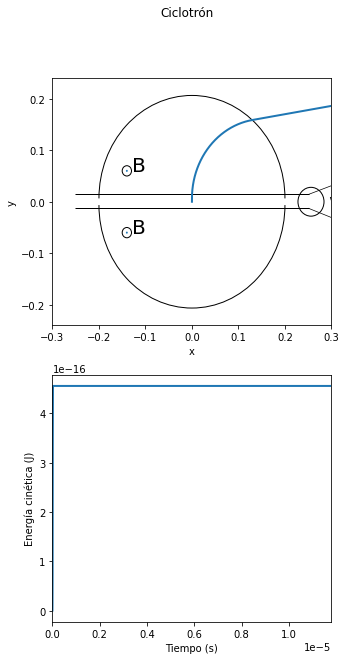

In [ ]:
# Este programa calcula la trayectoria de un determinado ion en un ciclotron
# Y grafica como va cambiando la energia cinetica del ion con el tiempo


ion='1p+'
m=iones[ion][0] # Masa del ion (Kg) 
q=iones[ion][1] # Carga del ion (C)


#Datos de entrada del programa
#m=6.64E-27  # masa del ion
#q=1.602E-19   #carga del ion
qm=q/m      # Relacion carga masa
B=0.05    # Campo magnético existente en las Ds (T)
#dV=5000  # Diferencia de potencial alterna existente entre las Ds
dE=0.013      # Separacion entre las Ds (m)
Rc=0.20     #Radio de las Ds del ciclotron (m)

# dE debe ser pequeño para que el tiempo que el ion pasa entre las Ds sea 
# despreciable frente al tiempo que el ion recorre en las Ds

E=dV/dE     #Campo electrico existente entre las Ds del ciclotron
omega=1.0*qm*B #frecuencia angular a la que oscila el voltaje entre las Ds 
# si omega=qm*B la frec. del ciclotron y la señal estaran en fase
# con el movimiento del ion

tI = dE*np.sqrt(2/dV/qm)
print('Tiempo en recorrer condensador tI= {:.3E} s'.format(tI))
a=q*dV/m/dE
print('Aceleración a la salida del condensador a= {:.3E} m/s'.format(a))
v=np.sqrt(2*dE*a)
print('Velocidad a la salida del condensador v= {:.3E} m/s'.format(v))

# Radio de giro. 

R = np.sqrt(2*dV*m/(q*B**2))
print('Radio R= {:.3E} m'.format(R))

# Tiempo en recorrer la semicircunferencia D.
sT=np.pi/qm/B
print('Semiperiodo T/2= {:.3E} s'.format(sT))
print('Frecuencia f= {:.3E} s'.format(1/sT))
#AEc=Ep=dV*q  AEc=q*V*(1/2+n)
AE=dV*q
print('Energía que gana en cada paso AEc= {:.3E} J'.format(AE))
#Ec=(q**2*Bf**2*R**2)/m/2
#print('Energía Ec= {:.3E} J'.format(Ec))

#tf=3   # tiempo final de simulacion
tf=9*(2*np.pi*m/q/B)
#tf=10*sT
par=[qm,E,B,dE,Rc,omega]

# Definicion de las ecuaciones de movimiento del ion
# El voltaje entre las Ds es una señal cuadrada con frecuencia
# angular omega y valor E, aunque existe la opcion de poner
# una señal sinusoidal

# Llamada a odeint que resuelve ec. Movimiento del ion
nt=1000000
z0=[0.0,0.0,0.0,0.0]    
t=np.linspace(0,tf,nt)
abserr = 1.0e-8
relerr = 1.0e-6

z=odeint(ciclotron,z0,t,args=(par,),atol=abserr, rtol=relerr)


#fig=plt.figure()
#fig, axarr=plt.subplots(1,2)
#fig.set_dpi(100)
#fig.set_size_inches(7,6.5)


# Definicion de las graficas
# Modificar los limites de los ejes a gusto, así como los titulos

f0 = figure(num = 0, figsize = (5, 10))#, dpi = 100)
f0.suptitle("Ciclotrón", fontsize=12)
ax01 = subplot2grid((2, 2), (0, 0),colspan=2)
ax02 = subplot2grid((2, 2), (1, 0),colspan=2)

# Limites de la grafica del ciclotron
ax01.set_xlim(-1.5*Rc,1.5*Rc)
ax01.set_ylim(-1.2*Rc,1.2*Rc)

# Limites de la grafica de la Ec(t)
# Modificarlo para ver la grafica
ax02.set_xlim(0,tf)

ax02.set_xlabel("Tiempo (s)")
ax02.set_ylabel("Energía cinética (J)")

# La primera linea corresponde a la trayectoria del ion en el ciclotron
# la segunda linea corresponde a la grafica de la energía cinetica en funcion del tiempo
# Modificar esta segunda linea si se quiere graficar otra variable o se pone la Ec en 
# otras unidades 
line, = ax01.plot(z[:,0],z[:,2], linewidth=2)

Ecn=m*(z[:,1]**2+z[:,3]**2)/2
line2, = ax02.plot(t[:],Ecn,linewidth=2)

ax02.ticklabel_format(axis='y', style='sci', scilimits=(-2,2))
ax02.ticklabel_format(axis='x', style='sci', scilimits=(-2,2))

# Crea los diferentes circulos, arcos, lineas y textos del dibujo
circle1=patches.Circle((-0.7*Rc,0.3*Rc),0.05*Rc,fill=False)
circle2=patches.Circle((-0.7*Rc,0.3*Rc),0.01*Rc)
circle3=patches.Circle((-0.7*Rc,-0.3*Rc),0.05*Rc,fill=False)
circle4=patches.Circle((-0.7*Rc,-0.3*Rc),0.01*Rc)


pac1 = patches.Arc([0,0.5*dE], 2*Rc, 2*Rc, angle=0, theta1=0, theta2=180)
pac2 = patches.Arc([0,-0.5*dE], 2*Rc, 2*Rc, angle=180, theta1=0, theta2=180)
line1=patches.Arrow(-Rc,0.5*dE,2.15*Rc,0.,width=0)
line2=patches.Arrow(-Rc,-0.5*dE,2.15*Rc,0.,width=0)
circle5=patches.Circle((1.28*Rc,0),0.14*Rc,fill=False)
line3=patches.Arrow(1.17*Rc,0.03*Rc,0.05*Rc,0,width=0)
line4=patches.Arrow(1.22*Rc,0.03*Rc,0,-0.08*Rc,width=0)
line5=patches.Arrow(1.22*Rc,-0.05*Rc,0.05*Rc,0,width=0)
line6=patches.Arrow(1.27*Rc,-0.05*Rc,0,0.08*Rc,width=0)
line7=patches.Arrow(1.27*Rc,0.03*Rc,0.05*Rc,0,width=0)
line8=patches.Arrow(1.32*Rc,0.03*Rc,0,-0.08*Rc,width=0)
line9=patches.Arrow(1.32*Rc,-0.05*Rc,0.05*Rc,0,width=0)
line10=patches.Arrow(1.37*Rc,-0.05*Rc,0,0.08*Rc,width=0)
         

# Add the patch to the Axes
ax01.add_patch(circle1)
ax01.add_patch(circle2)
ax01.add_patch(circle3)
ax01.add_patch(circle4)
ax01.add_patch(circle5)

ax01.text(-0.65*Rc,0.3*Rc, "B",fontsize=20)
ax01.text(-0.65*Rc,-0.3*Rc, "B",fontsize=20)

ax01.add_patch(pac1)
ax01.add_patch(pac2)
ax01.add_patch(line1)
ax01.add_patch(line2)
ax01.add_patch(line3)
ax01.add_patch(line4)
ax01.add_patch(line5)
ax01.add_patch(line6)
ax01.add_patch(line7)
ax01.add_patch(line8)
ax01.add_patch(line9)
ax01.add_patch(line10)

rect1 = patches.Rectangle((-0.252,-0.0125),0.503,0,linewidth=1,edgecolor='black',facecolor='none')
rect2 = patches.Rectangle((-0.252,0.0146),0.503,0,linewidth=1,edgecolor='black',facecolor='none')

rect3 = patches.Rectangle((0.25,-0.0125),0.06,0,angle=-20,linewidth=0.7,edgecolor='black',facecolor='none')
rect4 = patches.Rectangle((0.25,0.014),0.06,0,angle=19,linewidth=0.7,edgecolor='black',facecolor='none')
ax01.add_patch(rect1)
ax01.add_patch(rect2)
ax01.add_patch(rect3)
ax01.add_patch(rect4)

xt = np.linspace(0.298,0.345,100)
#xt = np.linspace(Rc*1.2,Rc*1.3,100)
yt = 0.02*np.sin(xt*150+2)
ax01.plot(xt, yt, 'black',linewidth= 1)


#plt.figure()   #Anade un nuevo grafico y lo activa
#plot(t[0:nt],z[0:nt,0], "r")
ax01.set_xlabel("x")
ax01.set_ylabel("y")
#ax02.set_title("Grafico")

plt.show()
